<a href="https://colab.research.google.com/github/RosanaTrevisan/Bootcamp_Data_Science_Aplicada_Alura/blob/main/Projeto_M%C3%B3dulo1_Rosana_Trevisan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto 1: Bootcamp Data Science Aplicada - Alura**

# **Objetivo**

Analisar bases de dados oficiais sobre Covid-19 para entender a evolução da doença em diferentes regiões e estados do Brasil.

# **Resumo e conclusões**

Foram realizadas análises de 2 bases de dados. A primeira (parcial) foi disponibilizada no GitHub da Alura e continha dados até dia 05/11/2020. A segunda (completa) foi extraída do diretamente do site do BRASIL.IO com informações até o dia 20/11/2020.

Na análise de número de mortes por 100 mil habitantes destacam-se os estados do Distrito Federal e do Rio de Janeiro, com elevado número de mortes em relação ao número de habitantes. O estado de São Paulo, que era o maior em número de mortes totais, ficou em 11o lugar quando consideramos à proporção em relação ao tamanho da população. Quando esta mesma análise é feita por região, destaque para a região Centro-Oeste devido ao grande número de mortes do Distrito Federal (estado com maior número de mortes / 100 mil habitantes) e estado do Mato Grosso (terceiro maior estado).

O Sudeste é a região com menor número de casos confirmados por 100 mil habitantes porém com a maior taxa de mortalidade. Esta tendência é causada principalmente pelo estado do RJ, que tem a maior taxa de mortalidade entre todos os estados,  e ao mesmo tempo menor número de casos confirmados, muito provavalmente resultado das péssimas condições da saúde pública no estado (baixo investimento, má administração, corrupção etc.) e devido ao baixo número de testes aplicados para detecção do Covid-19.
Já a região Centro-Oeste apresenta o cenário oposto: maior número de casos confirmados com baixa taxa de mortalidade. 
A região Sul é a que apresenta o melhor cenário de todas, com baixo número de casos e baixa taxa de mortalidade.


A evolução do COVID-19 foi diferente em cada região do Brasil. A região Norte foi a primeira a apresentar pico máximo de mortes no final do mês de maio. O pico das regiões Sudeste e Nordeste aconteceu no mês de junho. As regiões Centro-Oeste e Sul apresentaram picos "atrasados" no mês de agosto. De setembro ao início de novembro, todas as regiões apresentavam tendência de queda no número de mortes. Porém em meados de novembro, há uma indicação de novo aumento no número de mortes nas regiões Sudeste (mais acentuado), Sul e Centro-Oeste. Até a data de 20/11/2020 as regiões Norte e Nordeste não apresentaram tendência de alta no número de mortes em novembro. 

# **Análise dos dados:**

In [ ]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime

# **ANÁLISE DA BASE DE DADOS PARCIAL**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Base de dados disponibilizada no github da Alura, com informações até 05/11/2020
COVID = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ALURA BOOTCAMP/Módulo 1/Desafio Módulo 1/COVID.csv',encoding='UTF-8', sep=',')
COVID.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-05,AC,NaN,state,31248,697,234,True,881935.0,894470.0,12.0,3493.46540,0.0223
1,2020-11-04,AC,NaN,state,31218,696,233,False,881935.0,894470.0,12.0,3490.11146,0.0223
2,2020-11-03,AC,NaN,state,30962,695,232,False,881935.0,894470.0,12.0,3461.49116,0.0224
3,2020-11-02,AC,NaN,state,30954,693,231,False,881935.0,894470.0,12.0,3460.59678,0.0224
4,2020-11-01,AC,NaN,state,30951,693,230,False,881935.0,894470.0,12.0,3460.26138,0.0224


In [ ]:
#Fazendo uma cópia da base de dados para começar a análise
dados = COVID
dados.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-05,AC,NaN,state,31248,697,234,True,881935.0,894470.0,12.0,3493.46540,0.0223
1,2020-11-04,AC,NaN,state,31218,696,233,False,881935.0,894470.0,12.0,3490.11146,0.0223
2,2020-11-03,AC,NaN,state,30962,695,232,False,881935.0,894470.0,12.0,3461.49116,0.0224
3,2020-11-02,AC,NaN,state,30954,693,231,False,881935.0,894470.0,12.0,3460.59678,0.0224
4,2020-11-01,AC,NaN,state,30951,693,230,False,881935.0,894470.0,12.0,3460.26138,0.0224


In [ ]:
# convertendo os dados da coluna date para o formato correto de data
dados['date'] = pd.to_datetime(dados['date'], format='%Y-%m-%d')
dados.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-05,AC,NaN,state,31248,697,234,True,881935.0,894470.0,12.0,3493.46540,0.0223
1,2020-11-04,AC,NaN,state,31218,696,233,False,881935.0,894470.0,12.0,3490.11146,0.0223
2,2020-11-03,AC,NaN,state,30962,695,232,False,881935.0,894470.0,12.0,3461.49116,0.0224
3,2020-11-02,AC,NaN,state,30954,693,231,False,881935.0,894470.0,12.0,3460.59678,0.0224
4,2020-11-01,AC,NaN,state,30951,693,230,False,881935.0,894470.0,12.0,3460.26138,0.0224


## **Análise por estado**

In [ ]:
# iniciando a construção de uma base de dados por estado
dados_estado = dados[dados.place_type == 'state']
dados_estado.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-05,AC,NaN,state,31248,697,234,True,881935.0,894470.0,12.0,3493.46540,0.0223
1,2020-11-04,AC,NaN,state,31218,696,233,False,881935.0,894470.0,12.0,3490.11146,0.0223
2,2020-11-03,AC,NaN,state,30962,695,232,False,881935.0,894470.0,12.0,3461.49116,0.0224
3,2020-11-02,AC,NaN,state,30954,693,231,False,881935.0,894470.0,12.0,3460.59678,0.0224
4,2020-11-01,AC,NaN,state,30951,693,230,False,881935.0,894470.0,12.0,3460.26138,0.0224


In [ ]:
#alterando o index da tabela para state
dados_estado1 = dados_estado.set_index('state')
dados_estado1.head()

,date,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
state,,,,,,,,,,,,
AC,2020-11-05,NaN,state,31248,697,234,True,881935.0,894470.0,12.0,3493.46540,0.0223
AC,2020-11-04,NaN,state,31218,696,233,False,881935.0,894470.0,12.0,3490.11146,0.0223
AC,2020-11-03,NaN,state,30962,695,232,False,881935.0,894470.0,12.0,3461.49116,0.0224
AC,2020-11-02,NaN,state,30954,693,231,False,881935.0,894470.0,12.0,3460.59678,0.0224
AC,2020-11-01,NaN,state,30951,693,230,False,881935.0,894470.0,12.0,3460.26138,0.0224


In [ ]:
#listando somente a última informação disponível
dados_estado1 = dados_estado1.query('is_last == True')
dados_estado1.head()

,date,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
state,,,,,,,,,,,,
AC,2020-11-05,NaN,state,31248,697,234,True,881935.0,894470.0,12.0,3493.46540,0.0223
AP,2020-11-03,NaN,state,52832,751,228,True,845731.0,861773.0,16.0,6130.61676,0.0142
AM,2020-11-05,NaN,state,164070,4607,234,True,4144597.0,4207714.0,13.0,3899.26692,0.0281
AL,2020-11-05,NaN,state,91270,2258,240,True,3337357.0,3351543.0,27.0,2723.22330,0.0247
DF,2020-11-05,NaN,state,214955,3728,243,True,3015268.0,3055149.0,53.0,7035.82706,0.0173


### Gráfico número de mortes por estado

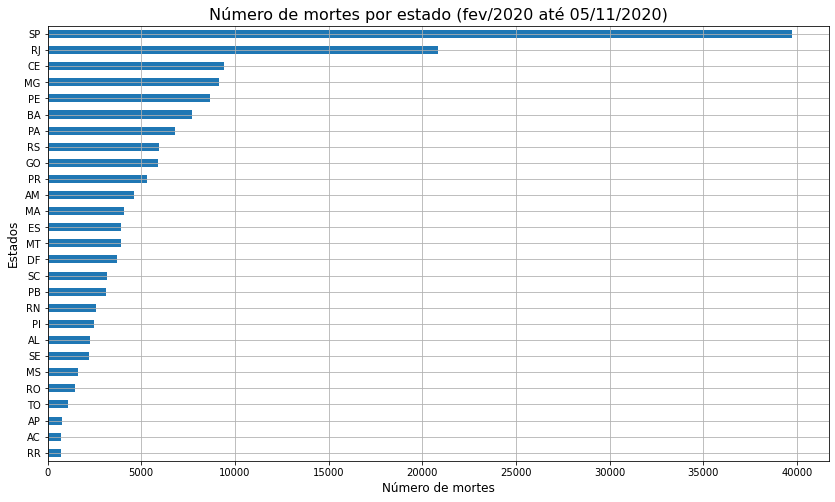

In [ ]:
#número de mortes por estado desde o início da pandemia
gr_mortes_estado = dados_estado1['deaths'].sort_values(ascending=True)
gr_mortes_estado = gr_mortes_estado.plot(kind='barh',figsize=(14,8))
gr_mortes_estado.set_ylabel('Estados', fontsize=12)
gr_mortes_estado.set_xlabel('Número de mortes', fontsize=12)
plt.title('Número de mortes por estado (fev/2020 até 05/11/2020)', fontsize=16)
plt.grid(True)
plt.show()

No gráfico de mortes por estado (número acumulado desde o início da pandemia até 05/11/2020), destacam-se os estados de São Paulo em primeiro lugar e Rio de Janeiro em segundo. Considerando que a população do estado de SP é a maior do Brasil, já era esperado que o número de mortes fosse o maior também. Porém o Rio de Janeiro em segundo lugar não condiz com o tamanho de sua população, que é menor que a do estado de MG que tem menos da metade do número de mortos do RJ. No caso do estado do RJ, fatores como a má administração do sistema de saúde podem ter contribuído para o alto número de mortes. Farei uma análise da proporção do número de mortes em relação à população de cada estado.

In [ ]:
#inserindo coluna com cálculo do número de mortes proporcional à população de cada estado
dados_estado1['mortes_100khabitantes'] = (dados_estado1['deaths'] / dados_estado1['estimated_population'])*100000
dados_estado1.head()

,date,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,mortes_100khabitantes
state,,,,,,,,,,,,,
AC,2020-11-05,NaN,state,31248,697,234,True,881935.0,894470.0,12.0,3493.46540,0.0223,77.923239
AP,2020-11-03,NaN,state,52832,751,228,True,845731.0,861773.0,16.0,6130.61676,0.0142,87.145919
AM,2020-11-05,NaN,state,164070,4607,234,True,4144597.0,4207714.0,13.0,3899.26692,0.0281,109.489381
AL,2020-11-05,NaN,state,91270,2258,240,True,3337357.0,3351543.0,27.0,2723.22330,0.0247,67.371954
DF,2020-11-05,NaN,state,214955,3728,243,True,3015268.0,3055149.0,53.0,7035.82706,0.0173,122.023509


### Gráfico número de mortes / 100 mil habitantes por estado

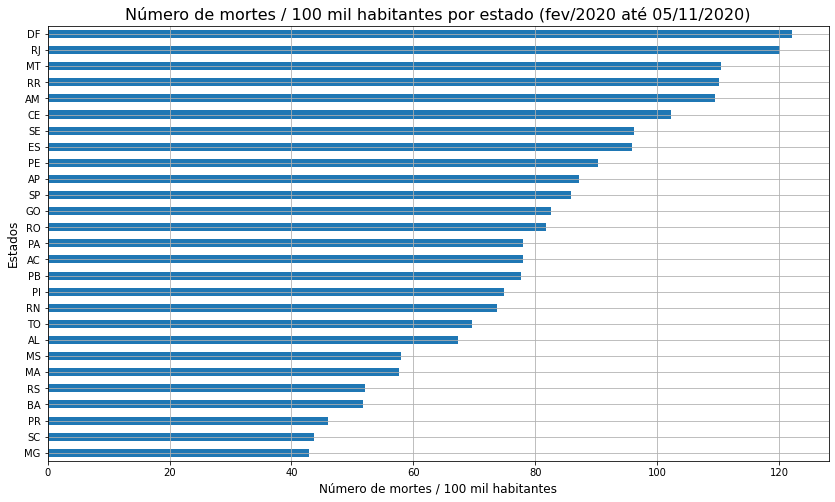

In [ ]:
gr_mortes_estado2 = dados_estado1['mortes_100khabitantes'].sort_values(ascending=True)
gr_mortes_estado2 = gr_mortes_estado2.plot(kind='barh',figsize=(14,8))
gr_mortes_estado2.set_ylabel('Estados', fontsize=12)
gr_mortes_estado2.set_xlabel('Número de mortes / 100 mil habitantes', fontsize=12)
plt.title('Número de mortes / 100 mil habitantes por estado (fev/2020 até 05/11/2020)', fontsize=16)
plt.grid(True)
plt.show()

O gráfico do número de mortes proporcional a 100 mil habitantes é bem diferente do gráfico anterior de número de mortes (total absoluto). Destaca-se o Distrito Federal, com elevado número de mortes em relação à sua pequena população. Destaque também para o estado do Rio de Janeiro, comprovando a tendência já observada no gráfico anterior. Interessante observar que o estado de São Paulo, que era o maior em número de mortes totais, está em 11o lugar quando consideramos à proporção em relação ao tamanho da população. Interessante também observar a tendência de que os 3 estados da região Sul apresentam os menores números de mortes proporcionalmente à sua população.

### Gráfico número de casos confirmados / 100 mil habitantes por estado

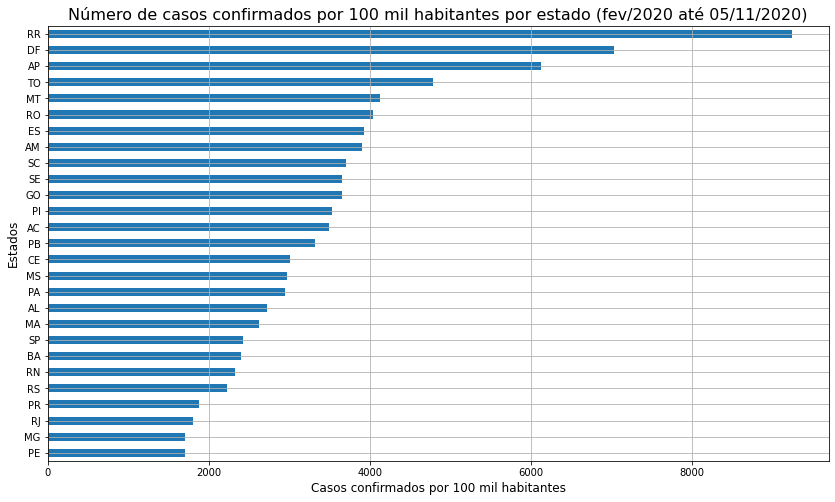

In [ ]:
#número de casos confirmados por 100k habitantes por estado
grafico_estado_confirmed = dados_estado1['confirmed_per_100k_inhabitants'].sort_values(ascending=True)
grafico_estado_confirmed = grafico_estado_confirmed.plot(kind='barh',figsize=(14,8))
grafico_estado_confirmed.set_ylabel('Estados', fontsize=12)
grafico_estado_confirmed.set_xlabel('Casos confirmados por 100 mil habitantes', fontsize=12)
plt.title('Número de casos confirmados por 100 mil habitantes por estado (fev/2020 até 05/11/2020)', fontsize=16)
plt.grid(True)
plt.show()

O gráfico com o número total de casos confirmados por estado é surpreendente pois destacam-se estados com pequena população como, por exemplo, Roraima e Amapá. Estados com maior população (ex: São Paulo) tem baixo número de casos confirmados comparando com outros estados menos populosos. Além disso, o estado do Rio de Janeiro que tem elevado número de mortes é um dos menores números de casos confirmados. Este resultado distorcido em SP e RJ provavelmente está relacionado ao baixo número de pessoas que fizeram o teste para identificação de COVID. Ou seja, se o nível de testagem (% da população) fosse igual em todos os estados, esperaria-se que estados mais populosos e/ou com maior número de mortes tivessem proporcionalmente maior número de casos confirmados.

### Gráfico taxa de mortalidade por estado

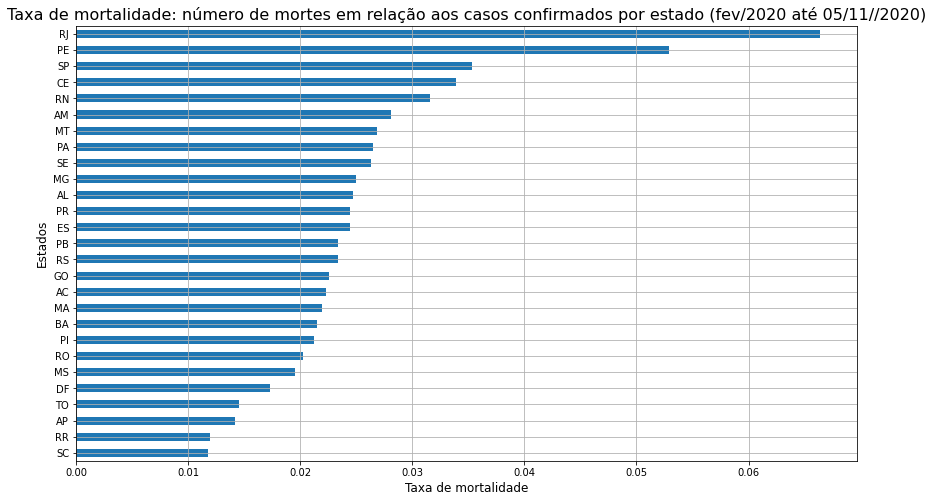

In [ ]:
#Taxa de mortalidade por estado
grafico_estado_death_rate = dados_estado1['death_rate'].sort_values(ascending=True)
grafico_estado_death_rate = grafico_estado_death_rate.plot(kind='barh',figsize=(14,8))
grafico_estado_death_rate.set_ylabel('Estados', fontsize=12)
grafico_estado_death_rate.set_xlabel('Taxa de mortalidade', fontsize=12)
plt.title('Taxa de mortalidade: número de mortes em relação aos casos confirmados por estado (fev/2020 até 05/11//2020)', fontsize=16)
plt.grid(True)
plt.show()

A taxa de mortalidade por estado calculada como o número de mortes didivido pelo número de casos confirmados reflete um pouco do que já vimos nas análises dos gráficos anteriores. Destaca-se a alta taxa de mortalidade do estado do Rio de Janeiro, com alto número de mortes e baixo número de casos confirmados. Em segundo lugar temos o estado de Pernambuco devido a ser o estado com menor número de casos confirmados do Brasil, muito provavelmente devido à baixa testagem.

## **Análise por região**

In [ ]:
#inclusão de coluna com as regiões do Brasil
regioes = {'SP': 'Sudeste', 'RJ': 'Sudeste', 'ES':'Sudeste', 'MG': 'Sudeste', 
           'PR':'Sul', 'RS':'Sul', 'SC': 'Sul',
           'AP': 'Norte', 'AC': 'Norte', 'AM': 'Norte', 'PA': 'Norte', 'RR':'Norte', 'RO': 'Norte', 'TO':'Norte',
           'AL':'Nordeste', 'CE':'Nordeste', 'BA':'Nordeste', 'MA':'Nordeste', 'PB': 'Nordeste', 'PE':'Nordeste', 'PI':'Nordeste', 'RN':'Nordeste', 'SE':'Nordeste',
           'DF':'Centro Oeste', 'MS':'Centro Oeste', 'MT':'Centro Oeste', 'GO':'Centro Oeste'}
UF = dados_estado['state']
dados_estado['region'] = UF.map(regioes)
dados_estado.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,region
0,2020-11-05,AC,NaN,state,31248,697,234,True,881935.0,894470.0,12.0,3493.46540,0.0223,Norte
1,2020-11-04,AC,NaN,state,31218,696,233,False,881935.0,894470.0,12.0,3490.11146,0.0223,Norte
2,2020-11-03,AC,NaN,state,30962,695,232,False,881935.0,894470.0,12.0,3461.49116,0.0224,Norte
3,2020-11-02,AC,NaN,state,30954,693,231,False,881935.0,894470.0,12.0,3460.59678,0.0224,Norte
4,2020-11-01,AC,NaN,state,30951,693,230,False,881935.0,894470.0,12.0,3460.26138,0.0224,Norte


In [ ]:
#base de dados organizada por região pegando somente os últimos dados
dados_regiao = dados_estado.query('is_last == True')
dados_regiao

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,region
0,2020-11-05,AC,NaN,state,31248,697,234,True,881935.0,894470.0,12.0,3493.46540,0.0223,Norte
4247,2020-11-03,AP,NaN,state,52832,751,228,True,845731.0,861773.0,16.0,6130.61676,0.0142,Norte
7574,2020-11-05,AM,NaN,state,164070,4607,234,True,4144597.0,4207714.0,13.0,3899.26692,0.0281,Norte
19808,2020-11-05,AL,NaN,state,91270,2258,240,True,3337357.0,3351543.0,27.0,2723.22330,0.0247,Nordeste
38885,2020-11-05,DF,NaN,state,214955,3728,243,True,3015268.0,3055149.0,53.0,7035.82706,0.0173,Centro Oeste
39594,2020-11-05,CE,NaN,state,277072,9392,235,True,9132078.0,9187103.0,23.0,3015.87998,0.0339,Nordeste
76251,2020-11-05,ES,NaN,state,159813,3896,245,True,4018650.0,4064052.0,32.0,3932.35618,0.0244,Sudeste
89089,2020-11-05,BA,NaN,state,359130,7731,243,True,14873064.0,14930634.0,29.0,2405.32318,0.0215,Nordeste
161655,2020-11-04,MS,NaN,state,83616,1629,236,True,2778986.0,2809394.0,50.0,2976.30023,0.0195,Centro Oeste
174541,2020-11-05,MA,NaN,state,186904,4101,231,True,7075181.0,7114598.0,21.0,2627.04934,0.0219,Nordeste


In [ ]:
dados_regiao = dados_regiao.groupby(['region']).sum()
dados_regiao

,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
region,,,,,,,,,
Centro Oeste,704348,15122,946,4,16297074.0,16504303.0,206.0,17799.31373,0.0862
Nordeste,1495950,42600,2096,9,57071654.0,57374243.0,225.0,25323.15369,0.2574
Norte,711398,16107,1605,7,18430980.0,18672591.0,98.0,34540.98222,0.1377
Sudeste,1964133,73590,975,4,88371433.0,89012240.0,131.0,9884.00048,0.1511
Sul,740647,14420,713,3,29975984.0,30192315.0,126.0,7820.71089,0.0596


### Gráfico de número de mortes por região

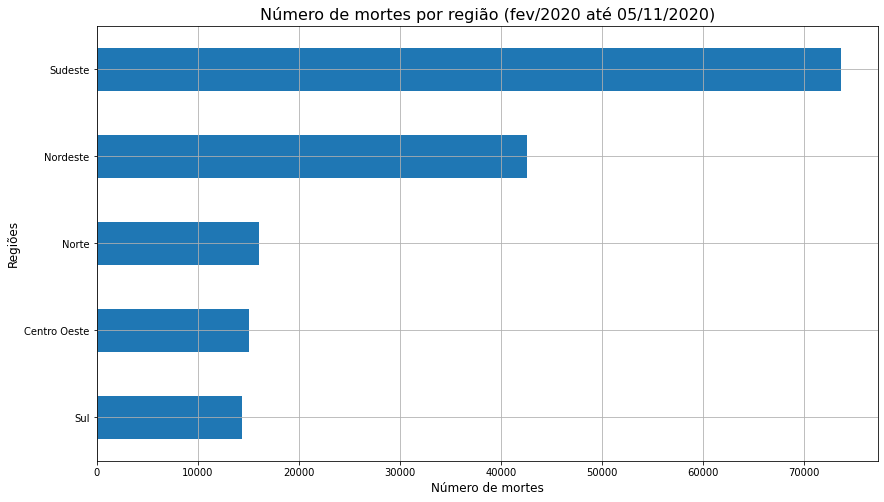

In [ ]:
#número de mortes por região desde o início da pandemia
gr_mortes_regiao = dados_regiao['deaths'].sort_values(ascending=True)
gr_mortes_regiao = gr_mortes_regiao.plot(kind='barh',figsize=(14,8))
gr_mortes_regiao.set_ylabel('Regiões', fontsize=12)
gr_mortes_regiao.set_xlabel('Número de mortes', fontsize=12)
plt.title('Número de mortes por região (fev/2020 até 05/11/2020)', fontsize=16)
plt.grid(True)
plt.show()

O gráfico de número de mortes por região confirma algumas tendências já observadas nos gráficos por estados. A região Sudeste é a que se destaca com maior número de mortes total, puxada principalmente pelos estados de São Paulo e Rio de Janeiro. A região Nordeste está em segundo lugar, devido aos estados de Pernambuco e Bahia.

In [ ]:
#inserindo coluna com cálculo do número de mortes proporcional à população de cada região
dados_regiao['mortes_100khabitantes'] = (dados_regiao['deaths'] / dados_regiao['estimated_population'])*100000
dados_regiao.head()

,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,mortes_100khabitantes
region,,,,,,,,,,
Centro Oeste,704348,15122,946,4,16297074.0,16504303.0,206.0,17799.31373,0.0862,91.624590
Nordeste,1495950,42600,2096,9,57071654.0,57374243.0,225.0,25323.15369,0.2574,74.249346
Norte,711398,16107,1605,7,18430980.0,18672591.0,98.0,34540.98222,0.1377,86.260123
Sudeste,1964133,73590,975,4,88371433.0,89012240.0,131.0,9884.00048,0.1511,82.674023
Sul,740647,14420,713,3,29975984.0,30192315.0,126.0,7820.71089,0.0596,47.760498


### Gráfico número de mortes / 100 mil habitantes por região

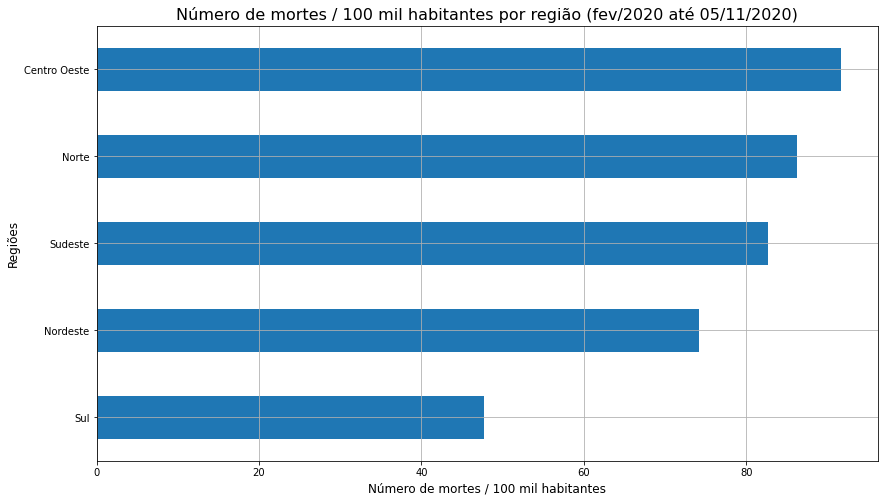

In [ ]:
gr_mortes_regiao2 = dados_regiao['mortes_100khabitantes'].sort_values(ascending=True)
gr_mortes_regiao2 = gr_mortes_regiao2.plot(kind='barh',figsize=(14,8))
gr_mortes_regiao2.set_ylabel('Regiões', fontsize=12)
gr_mortes_regiao2.set_xlabel('Número de mortes / 100 mil habitantes', fontsize=12)
plt.title('Número de mortes / 100 mil habitantes por região (fev/2020 até 05/11/2020)', fontsize=16)
plt.grid(True)
plt.show()

Quando consideramos o número de mortes proporcional à população de cada região, temos um gráfico muito diferente do anterior, com exceção da região Sul, que continua sendo a de menor valor. Destaque para o Centro-Oeste devido ao grande número de mortes do Distrito Federal (estado com maior número de mortes / 100 mil habitantes) e estado do Mato Grosso (terceiro maior estado).

In [ ]:
# como as colunas confirmed_per_100k_inhabitants e death_rate ficaram com valores errados no agrupamento
# por região, vou calcular os valores corretos e deletar as colunas que não serão usadas
dados_regiao['death_rate_new'] = (dados_regiao['deaths']  / dados_regiao['confirmed'])
dados_regiao['confirmed_new'] = (dados_regiao['confirmed'] / dados_regiao['estimated_population'])*100000 
dados_regiao = dados_regiao.drop('order_for_place', axis=1)
dados_regiao = dados_regiao.drop('is_last', axis=1)
dados_regiao = dados_regiao.drop('estimated_population_2019', axis=1)
dados_regiao = dados_regiao.drop('city_ibge_code', axis=1)
dados_regiao.head()

,confirmed,deaths,estimated_population,confirmed_per_100k_inhabitants,death_rate,mortes_100khabitantes,death_rate_new,confirmed_new
region,,,,,,,,
Centro Oeste,704348,15122,16504303.0,17799.31373,0.0862,91.624590,0.021470,4267.662803
Nordeste,1495950,42600,57374243.0,25323.15369,0.2574,74.249346,0.028477,2607.354663
Norte,711398,16107,18672591.0,34540.98222,0.1377,86.260123,0.022641,3809.851563
Sudeste,1964133,73590,89012240.0,9884.00048,0.1511,82.674023,0.037467,2206.587543
Sul,740647,14420,30192315.0,7820.71089,0.0596,47.760498,0.019469,2453.097750


### Gráfico número de casos confirmados / 100k habitantes por região

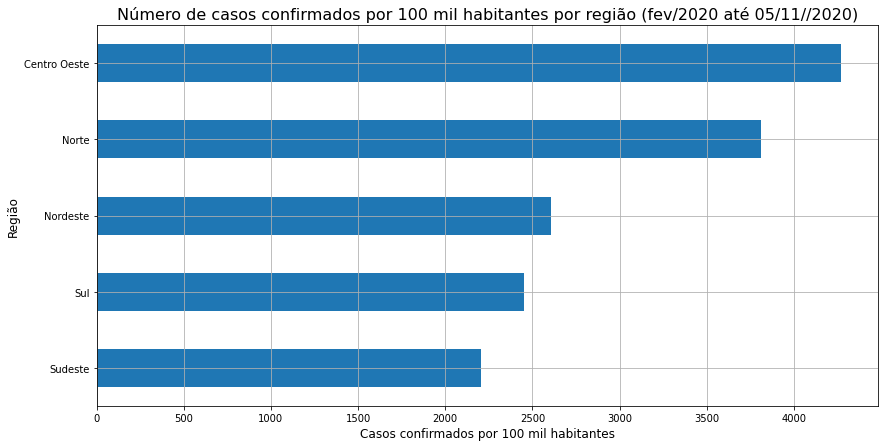

In [ ]:
#número de casos confirmados por 100k habitantes por região
grafico_region_confirmed = dados_regiao['confirmed_new'].sort_values(ascending=True)
grafico_region_confirmed = grafico_region_confirmed.plot(kind='barh',figsize=(14,7))
grafico_region_confirmed.set_ylabel('Região', fontsize=12)
grafico_region_confirmed.set_xlabel('Casos confirmados por 100 mil habitantes', fontsize=12)
plt.title('Número de casos confirmados por 100 mil habitantes por região (fev/2020 até 05/11//2020)', fontsize=16)
plt.grid(True)
plt.show()

Destaque para a região Centro-Oeste: maior número de casos confirmados puxado pelo Distrito Federal. Região Sudeste mostra claramente que o número de casos confirmados não é proporcional à população (se fosse deveria ser a maior), muito provavelmente devido à baixa quantidade de testes aplicados para detecção do COVID.

### Gráfico taxa de mortalidade por região

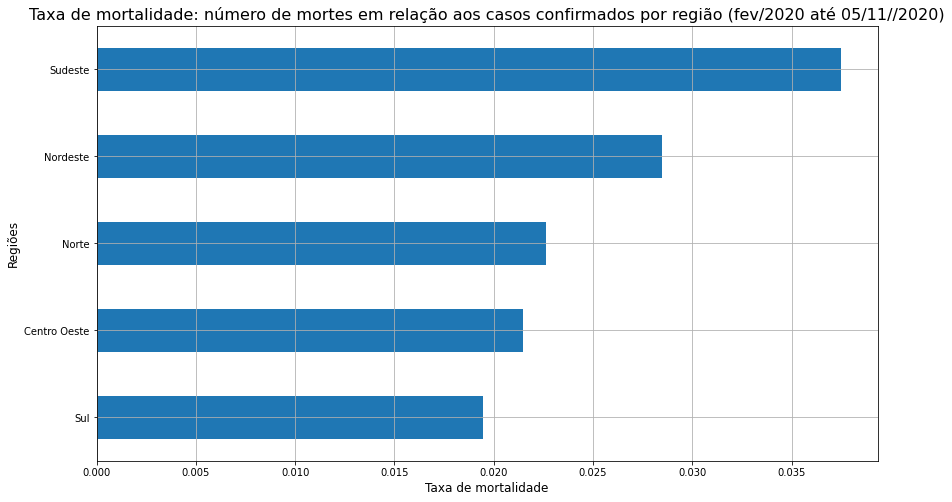

In [ ]:
#Taxa de mortalidade por região
grafico_regiao_death_rate = dados_regiao['death_rate_new'].sort_values(ascending=True)
grafico_regiao_death_rate = grafico_regiao_death_rate.plot(kind='barh',figsize=(14,8))
grafico_regiao_death_rate.set_ylabel('Regiões', fontsize=12)
grafico_regiao_death_rate.set_xlabel('Taxa de mortalidade', fontsize=12)
plt.title('Taxa de mortalidade: número de mortes em relação aos casos confirmados por região (fev/2020 até 05/11//2020)', fontsize=16)
plt.grid(True)
plt.show()

Confirmando o que já vimos nas análises por estados, a região Sudeste se destaca na taxa de mortalidade principalmente devido ao elevado número de mortes nos estados de São Paulo e Rio de Janeiro.

### Gráfico da relação entre o número de casos confirmados e a taxa de mortalidade por região

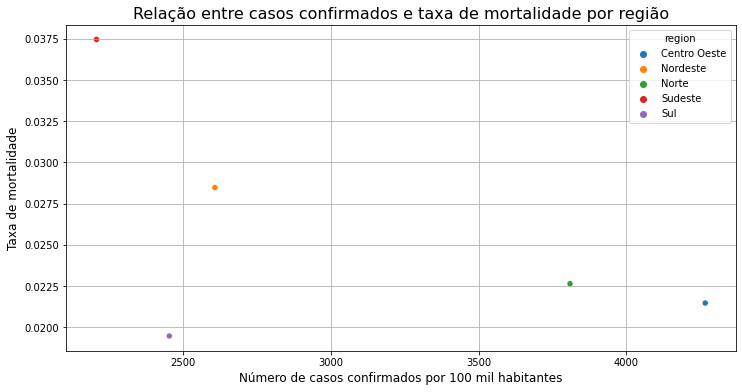

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.scatterplot(data= dados_regiao, x='confirmed_new' , y='death_rate_new', hue='region')
ax.set_title('Relação entre casos confirmados e taxa de mortalidade por região', fontsize=16)
ax.set_xlabel('Número de casos confirmados por 100 mil habitantes', fontsize=12)
ax.set_ylabel('Taxa de mortalidade', fontsize=12)
plt.grid(True)
plt.show()

Região Sudeste é a com menor número de casos confirmados por 100 mil habitantes porém com a maior taxa de mortalidade. Esta tendência é causada principalmente pelo estado do RJ, que tem a maior taxa de mortalidade entre todos os estados,  e ao mesmo tempo menor número de casos confirmados, muito provavalmente resultado das péssimas condições da saúde pública no estado (baixo investimento, má administração, etc.) e devido ao baixo número de testes aplicados para detecção do Covid-19.
Já a região Centro-Oeste apresenta o cenário oposto: maior número de casos confirmados com baixa taxa de mortalidade. A região Sul é a que apresenta o melhor cenário de todas, com baixo número de casos e baixa taxa de mortalidade.

# **ANÁLISE DA BASE DE DADOS COMPLETA**

Base de dados completa obtida através de download diretamente do site BRASIL.IO no dia 21/11/2020. O objetivo de analisar esta base de dados é veriicar a evolução de novas mortes e novos casos confirmados ao longo do tempo, inclusive para checar o que as notícias recentes estão falando sobre uma segunda onda no mês de novembro.

In [ ]:
#Base de dados que fiz download diretamente do site BRASIL.IO, com dados até dia 20/11/2020
COVID = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ALURA BOOTCAMP/Módulo 1/Desafio Módulo 1/caso_full2.csv',encoding='UTF-8', sep=',')
COVID

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,São Paulo,3550308.0,2020-02-25,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-25,0.0000,0,1,city,SP,1,0
1,NaN,35.0,2020-02-25,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-25,0.0000,0,1,state,SP,1,0
2,São Paulo,3550308.0,2020-02-26,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-26,0.0000,0,2,city,SP,0,0
3,NaN,35.0,2020-02-26,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-26,0.0000,0,2,state,SP,0,0
4,São Paulo,3550308.0,2020-02-27,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-27,0.0000,0,3,city,SP,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089273,NaN,43.0,2020-11-20,47,11422973.0,11377239.0,True,False,293221,2566.94120,2020-11-20,0.0220,6447,256,state,RS,3298,37
1089274,NaN,42.0,2020-11-20,47,7252502.0,7164788.0,True,False,317502,4377.82713,2020-11-20,0.0108,3435,254,state,SC,6109,30
1089275,NaN,28.0,2020-11-20,47,2318822.0,2298696.0,True,False,86847,3745.30688,2020-11-20,0.0262,2274,252,state,SE,235,4
1089276,NaN,35.0,2020-11-20,47,46289333.0,45919049.0,True,False,1200348,2593.14171,2020-11-20,0.0343,41179,270,state,SP,9058,105


In [ ]:
#Fazendo uma cópia da base de dados para começar a análise
dados2 = COVID
dados2

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,São Paulo,3550308.0,2020-02-25,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-25,0.0000,0,1,city,SP,1,0
1,NaN,35.0,2020-02-25,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-25,0.0000,0,1,state,SP,1,0
2,São Paulo,3550308.0,2020-02-26,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-26,0.0000,0,2,city,SP,0,0
3,NaN,35.0,2020-02-26,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-26,0.0000,0,2,state,SP,0,0
4,São Paulo,3550308.0,2020-02-27,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-27,0.0000,0,3,city,SP,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089273,NaN,43.0,2020-11-20,47,11422973.0,11377239.0,True,False,293221,2566.94120,2020-11-20,0.0220,6447,256,state,RS,3298,37
1089274,NaN,42.0,2020-11-20,47,7252502.0,7164788.0,True,False,317502,4377.82713,2020-11-20,0.0108,3435,254,state,SC,6109,30
1089275,NaN,28.0,2020-11-20,47,2318822.0,2298696.0,True,False,86847,3745.30688,2020-11-20,0.0262,2274,252,state,SE,235,4
1089276,NaN,35.0,2020-11-20,47,46289333.0,45919049.0,True,False,1200348,2593.14171,2020-11-20,0.0343,41179,270,state,SP,9058,105


In [ ]:
# convertendo os dados da coluna date para o formato correto de data
dados2['date'] = pd.to_datetime(dados2['date'], format='%Y-%m-%d')
dados2.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,São Paulo,3550308.0,2020-02-25,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-25,0.0,0,1,city,SP,1,0
1,NaN,35.0,2020-02-25,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-25,0.0,0,1,state,SP,1,0
2,São Paulo,3550308.0,2020-02-26,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-26,0.0,0,2,city,SP,0,0
3,NaN,35.0,2020-02-26,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-26,0.0,0,2,state,SP,0,0
4,São Paulo,3550308.0,2020-02-27,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-27,0.0,0,3,city,SP,0,0


## Análise do estado de São Paulo

In [ ]:
# iniciando a construção da base de dados para o estado de SP
dados_SP = dados2[dados2.place_type == 'state']
dados_SP = dados_SP[dados_SP.state == 'SP']
dados_SP

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
1,NaN,35.0,2020-02-25,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-25,0.0000,0,1,state,SP,1,0
3,NaN,35.0,2020-02-26,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-26,0.0000,0,2,state,SP,0,0
5,NaN,35.0,2020-02-27,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-27,0.0000,0,3,state,SP,0,0
7,NaN,35.0,2020-02-28,9,46289333.0,45919049.0,False,False,2,0.00432,2020-02-28,0.0000,0,4,state,SP,1,0
9,NaN,35.0,2020-02-29,9,46289333.0,45919049.0,False,False,2,0.00432,2020-02-29,0.0000,0,5,state,SP,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066816,NaN,35.0,2020-11-16,47,46289333.0,45919049.0,False,False,1169377,2526.23428,2020-11-16,0.0347,40576,266,state,SP,737,12
1072431,NaN,35.0,2020-11-17,47,46289333.0,45919049.0,False,False,1178075,2545.02479,2020-11-17,0.0346,40749,267,state,SP,8698,173
1078046,NaN,35.0,2020-11-18,47,46289333.0,45919049.0,False,False,1184496,2558.89624,2020-11-18,0.0346,40927,268,state,SP,6421,178
1083661,NaN,35.0,2020-11-19,47,46289333.0,45919049.0,False,False,1191290,2573.57348,2020-11-19,0.0345,41074,269,state,SP,6794,147


In [ ]:
dados_SP = dados_SP.set_index('date')
dados_SP.head()

,city,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
date,,,,,,,,,,,,,,,,,
2020-02-25,NaN,35.0,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-25,0.0,0,1,state,SP,1,0
2020-02-26,NaN,35.0,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-26,0.0,0,2,state,SP,0,0
2020-02-27,NaN,35.0,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-27,0.0,0,3,state,SP,0,0
2020-02-28,NaN,35.0,9,46289333.0,45919049.0,False,False,2,0.00432,2020-02-28,0.0,0,4,state,SP,1,0
2020-02-29,NaN,35.0,9,46289333.0,45919049.0,False,False,2,0.00432,2020-02-29,0.0,0,5,state,SP,0,0


### Gráfico número acumulado de mortes no estado de São Paulo desde o início da pandemia

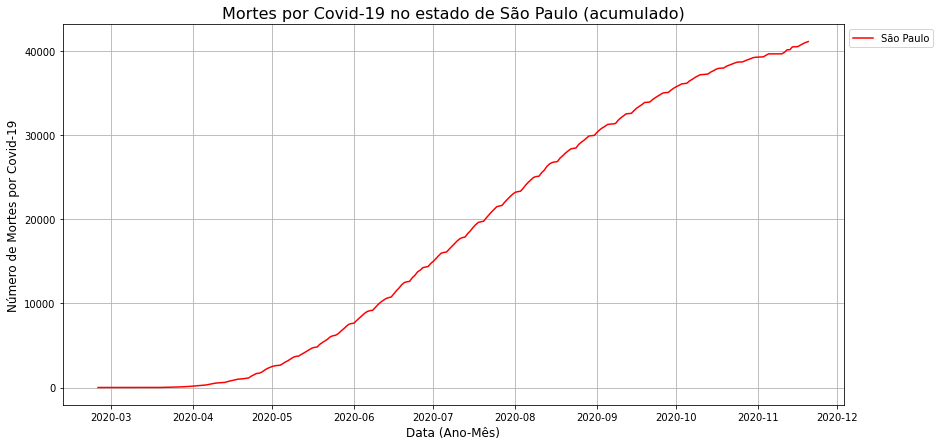

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(dados_SP.index.unique(),dados_SP.groupby(dados_SP.index).sum()['new_deaths'].cumsum(), label='São Paulo', color='red')
plt.title('Mortes por Covid-19 no estado de São Paulo (acumulado)', fontsize=16)
plt.xlabel('Data (Ano-Mês)', fontsize=12)
plt.ylabel('Número de Mortes por Covid-19', fontsize=12)
plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.grid(True)
plt.show()

No estado de São Paulo, mais de 40 mil pessoas já morreram desde o início da pandemia até novembro. 

### Gráfico evolução número de novas mortes + média móvel 14 dias no estado de São Paulo

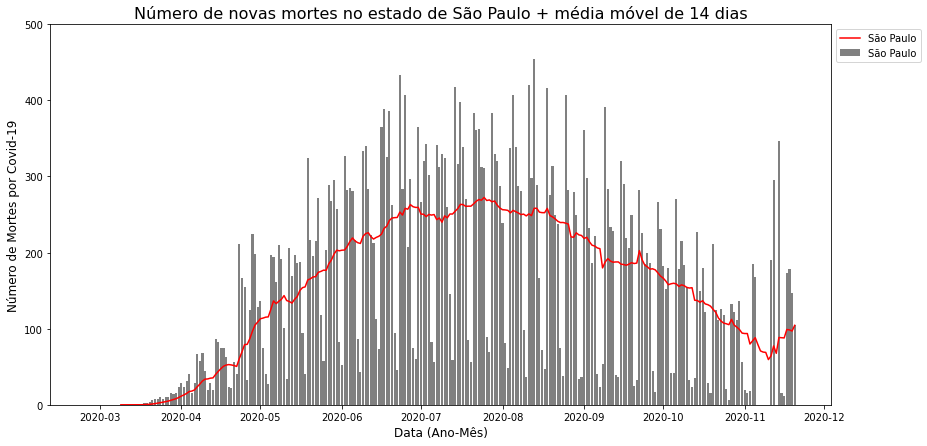

In [ ]:
plt.figure(figsize=(14,7))
plt.bar(dados_SP.index.unique(),dados_SP.groupby(dados_SP.index).sum()['new_deaths'], label='São Paulo', color='gray')
plt.plot(dados_SP.index.unique(),dados_SP.groupby(dados_SP.index).sum()['new_deaths'].rolling(14).mean(), label='São Paulo', color='red')
plt.title('Número de novas mortes no estado de São Paulo + média móvel de 14 dias', fontsize=16)
plt.xlabel('Data (Ano-Mês)', fontsize=12)
plt.ylabel('Número de Mortes por Covid-19', fontsize=12)
plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.ylim(0, 500)
plt.show()

Neste gráfico de número de novas mortes, podemos dizer que infelizmente o estado de São Paulo parece ter iniciado uma segunda onda. A primeira onda teve picos entre os meses de junho e agosto (máximo). Após pico em agosto, início de queda no número de mortes. Números voltam a crescer em meados de novembro, confirmando o que temos visto em notícias recentes, provavelmente o início de uma segunda onda. Será que esta tendência também será observada em outros estados do Brasil? 

## Análise do estado do Rio de Janeiro

In [ ]:
# iniciando a construção da base de dados para o estado do RJ
dados_RJ = dados2[dados2.place_type == 'state']
dados_RJ = dados_RJ[dados_RJ.state == 'RJ']
dados_RJ = dados_RJ.set_index('date')
dados_RJ.head()

,city,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
date,,,,,,,,,,,,,,,,,
2020-03-05,NaN,33.0,10,17366189.0,17264943.0,False,False,1,0.00576,2020-03-05,0.0,0,1,state,RJ,1,0
2020-03-06,NaN,33.0,10,17366189.0,17264943.0,False,False,2,0.01152,2020-03-06,0.0,0,2,state,RJ,1,0
2020-03-07,NaN,33.0,10,17366189.0,17264943.0,False,True,2,0.01152,2020-03-06,0.0,0,3,state,RJ,0,0
2020-03-08,NaN,33.0,11,17366189.0,17264943.0,False,False,3,0.01727,2020-03-08,0.0,0,4,state,RJ,1,0
2020-03-09,NaN,33.0,11,17366189.0,17264943.0,False,True,3,0.01727,2020-03-08,0.0,0,5,state,RJ,0,0


### Gráfico comparação do número acumulado de mortes nos estados SP e RJ desde o início da pandemia

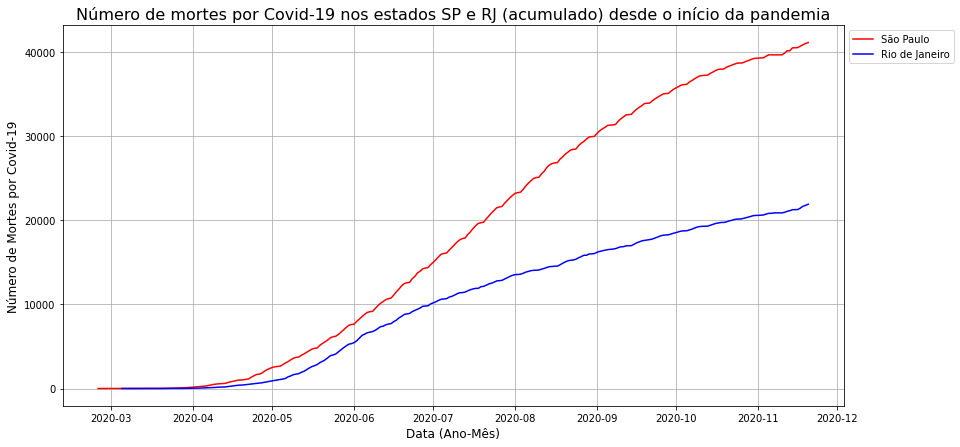

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(dados_SP.index.unique(),dados_SP.groupby(dados_SP.index).sum()['new_deaths'].cumsum(), label='São Paulo', color='red')
plt.plot(dados_RJ.index.unique(),dados_RJ.groupby(dados_RJ.index).sum()['new_deaths'].cumsum(), label='Rio de Janeiro', color='blue')
plt.title('Número de mortes por Covid-19 nos estados SP e RJ (acumulado) desde o início da pandemia', fontsize=16)
plt.xlabel('Data (Ano-Mês)', fontsize=12)
plt.ylabel('Número de Mortes por Covid-19', fontsize=12)
plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.grid(True)
plt.show()

O número total de mortes no estado do RJ é aproximadamente metade do estado de SP. Porém o número de habitantes do RJ (16 milhões) é menos da metade do número de habitantes do estado de SP (45 milhões), indicando que o estado do RJ tem maior número total de casos em proporção à população.

### Gráfico evolução número de novas mortes + média móvel 14 dias no estado do Rio de Janeiro

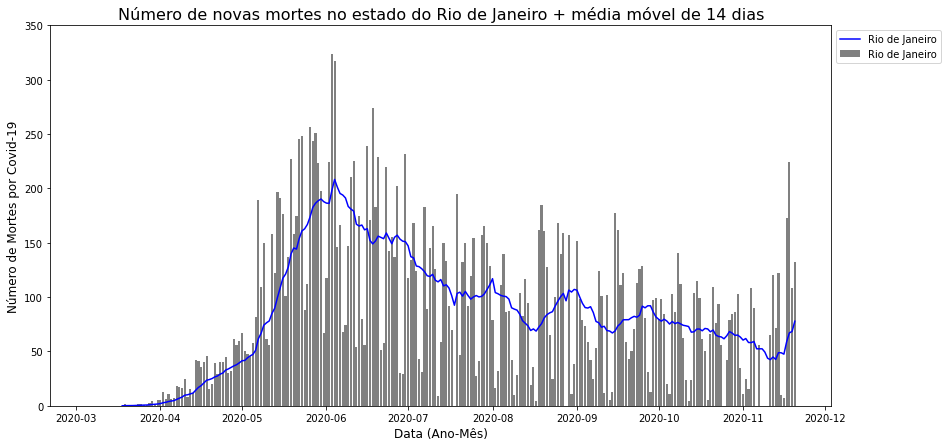

In [ ]:
plt.figure(figsize=(14,7))
plt.bar(dados_RJ.index.unique(),dados_RJ.groupby(dados_RJ.index).sum()['new_deaths'], label='Rio de Janeiro', color='gray')
plt.plot(dados_RJ.index.unique(),dados_RJ.groupby(dados_RJ.index).sum()['new_deaths'].rolling(14).mean(), label='Rio de Janeiro', color='blue')
plt.title('Número de novas mortes no estado do Rio de Janeiro + média móvel de 14 dias', fontsize=16)
plt.xlabel('Data (Ano-Mês)', fontsize=12)
plt.ylabel('Número de Mortes por Covid-19', fontsize=12)
plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.ylim(0, 350)
plt.show()

Em relação à primeira onda, o perfil do gráfico do estado do Rio de Janeiro é diferente do estado de SP pois o pico máximo aconteceu antes (início de junho). Porém o indicativo de iníciod e uma segunda onda em meados de novembro também se repete no RJ, assim como vimos no gráfico de SP.

## Análise por região

In [ ]:
#inclusão de coluna com as regiões do Brasil
regioes = {'SP': 'Sudeste', 'RJ': 'Sudeste', 'ES':'Sudeste', 'MG': 'Sudeste', 
           'PR':'Sul', 'RS':'Sul', 'SC': 'Sul',
           'AP': 'Norte', 'AC': 'Norte', 'AM': 'Norte', 'PA': 'Norte', 'RR':'Norte', 'RO': 'Norte', 'TO':'Norte',
           'AL':'Nordeste', 'CE':'Nordeste', 'BA':'Nordeste', 'MA':'Nordeste', 'PB': 'Nordeste', 'PE':'Nordeste', 'PI':'Nordeste', 'RN':'Nordeste', 'SE':'Nordeste',
           'DF':'Centro_Oeste', 'MS':'Centro_Oeste', 'MT':'Centro_Oeste', 'GO':'Centro_Oeste'}
UF = dados2['state']
dados2['region'] = UF.map(regioes)
dados2.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,region
0,São Paulo,3550308.0,2020-02-25,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-25,0.0,0,1,city,SP,1,0,Sudeste
1,NaN,35.0,2020-02-25,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-25,0.0,0,1,state,SP,1,0,Sudeste
2,São Paulo,3550308.0,2020-02-26,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-26,0.0,0,2,city,SP,0,0,Sudeste
3,NaN,35.0,2020-02-26,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-26,0.0,0,2,state,SP,0,0,Sudeste
4,São Paulo,3550308.0,2020-02-27,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-27,0.0,0,3,city,SP,0,0,Sudeste


In [ ]:
#vamos filtrar somente dados dos estados
dados2 = dados2[dados2.place_type == 'state']
dados2 = dados2.set_index('date')
dados2.head()

,city,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,region
date,,,,,,,,,,,,,,,,,,
2020-02-25,NaN,35.0,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-25,0.0,0,1,state,SP,1,0,Sudeste
2020-02-26,NaN,35.0,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-26,0.0,0,2,state,SP,0,0,Sudeste
2020-02-27,NaN,35.0,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-27,0.0,0,3,state,SP,0,0,Sudeste
2020-02-28,NaN,35.0,9,46289333.0,45919049.0,False,False,2,0.00432,2020-02-28,0.0,0,4,state,SP,1,0,Sudeste
2020-02-29,NaN,35.0,9,46289333.0,45919049.0,False,False,2,0.00432,2020-02-29,0.0,0,5,state,SP,0,0,Sudeste


In [ ]:
#criação de dataframes separados para cada uma das regiões do Brasil
Sudeste = dados2.query('region == "Sudeste"')
Nordeste = dados2.query('region == "Nordeste"')
Norte = dados2.query('region == "Norte"')
Centro_Oeste = dados2.query('region == "Centro_Oeste"')
Sul = dados2.query('region == "Sul"')

### Gráfico evolução mortes (média móvel 14 dias) por região do Brasil

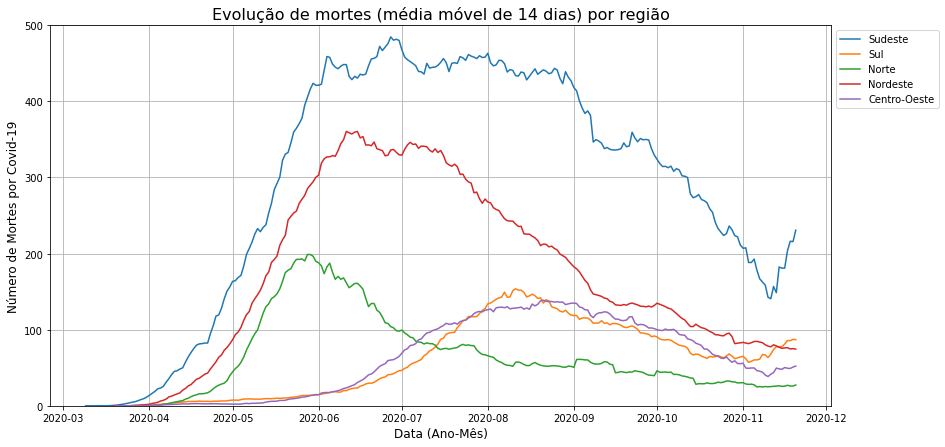

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(Sudeste.index.unique(),Sudeste.groupby(Sudeste.index).sum()['new_deaths'].rolling(14).mean(), label='Sudeste')
plt.plot(Sul.index.unique(),Sul.groupby(Sul.index).sum()['new_deaths'].rolling(14).mean(), label='Sul')
plt.plot(Norte.index.unique(),Norte.groupby(Norte.index).sum()['new_deaths'].rolling(14).mean(), label='Norte')
plt.plot(Nordeste.index.unique(),Nordeste.groupby(Nordeste.index).sum()['new_deaths'].rolling(14).mean(), label='Nordeste')
plt.plot(Centro_Oeste.index.unique(),Centro_Oeste.groupby(Centro_Oeste.index).sum()['new_deaths'].rolling(14).mean(), label='Centro-Oeste')
plt.title('Evolução de mortes (média móvel de 14 dias) por região', fontsize=16)
plt.xlabel('Data (Ano-Mês)', fontsize=12)
plt.ylabel('Número de Mortes por Covid-19', fontsize=12)
plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.grid(True)
plt.ylim(0, 500)
plt.show()

A evolução do COVID-19 foi diferente em cada região do Brasil. A região Norte foi a primeira a apresentar pico máximo de mortes no final do mês de maio. O pico das regiões Sudeste e Nordeste aconteceu no mês de junho. As regiões Centro-Oeste e Sul apresentaram picos "atrasados" no mês de agosto. De setembro ao início de novembro, todas as regiões apresentavam tendência de queda no número de mortes. Porém em meados de novembro, há uma indicação de novo aumento no número de mortes nas regiões Sudeste (mais acentuado), Sul e Centro-Oeste. Até a data de 20/11/2020 as regiões Norte e Nordeste não apresentaram tendência de alta no número de mortes em novembro. 